In [23]:
import numpy as np 
import pandas as pd 

In [5]:
#importing libraries
import numpy as np 
import pandas as pd 
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

## ML Modelling ## 
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
#load the data 
train_df = pd.read_csv('twitter_training.csv',header= None)
train_df.columns =['Id', 'Entity', 'Sentiment', 'Tweet']
train_df['Sentiment'] = train_df['Sentiment'].replace('Irrelevant', 'Neutral')
train_df.head()

test_df = pd.read_csv('twitter_validation.csv',header= None)
test_df.columns =['Id', 'Entity', 'Sentiment', 'Tweet']
test_df['Sentiment'] = train_df['Sentiment'].replace('Irrelevant', 'Neutral')

In [7]:
train_df.isnull().sum()

Id             0
Entity         0
Sentiment      0
Tweet        686
dtype: int64

In [8]:
train_df=train_df.dropna()


In [9]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|([^s]+.com)|(https?://[^s]+))','',data)


train_df['Tweet'] = train_df['Tweet'].apply(cleaning_URLs)


In [10]:

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)


train_df['Tweet'] = train_df['Tweet'].apply(cleaning_numbers)

In [11]:
def cleaning_punctation(data):
    return re.sub('[^a-zA-Z#]+', ' ', data)


train_df['Tweet'] = train_df['Tweet'].apply(cleaning_punctation)

In [12]:

pattern_to_remove = r'\S+@\S+'  

train_df['Tweet'] = train_df['Tweet'].str.replace(pattern_to_remove, '', regex=True)

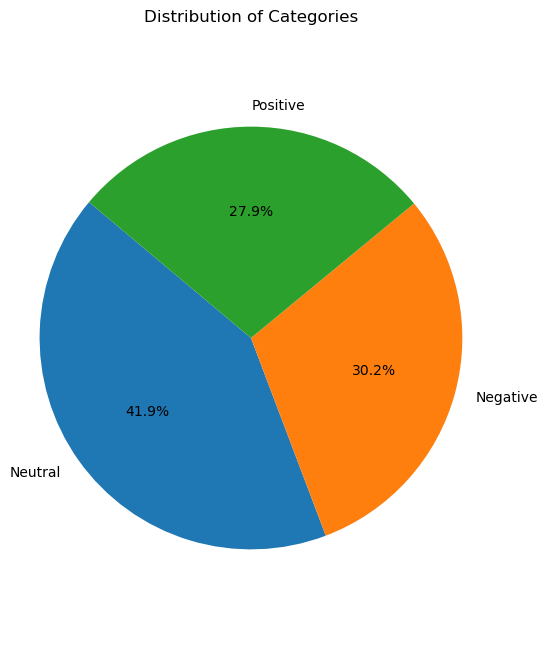

In [13]:

category_counts = train_df['Sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Distribution of Categories')
plt.show()

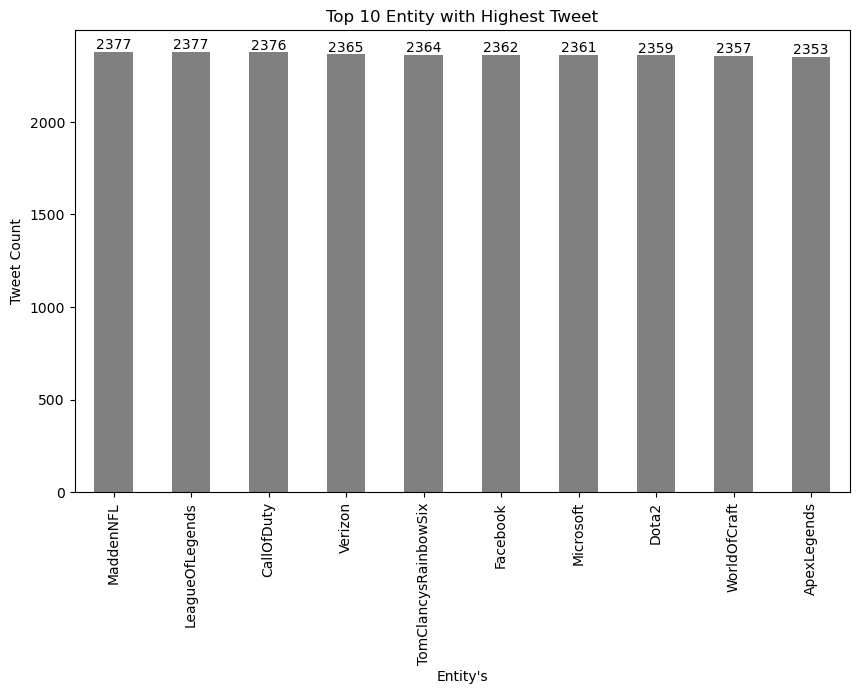

In [14]:
# Count the occurrences of each category
entity_counts = train_df['Entity'].value_counts()


top_10_entity = entity_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_entity.plot(kind='bar', color='Grey')

for i, count in enumerate(entity_counts):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')
    
plt.xlabel("Entity's")
plt.ylabel('Tweet Count')
plt.title('Top 10 Entity with Highest Tweet')
plt.xticks(rotation=90)
plt.show()


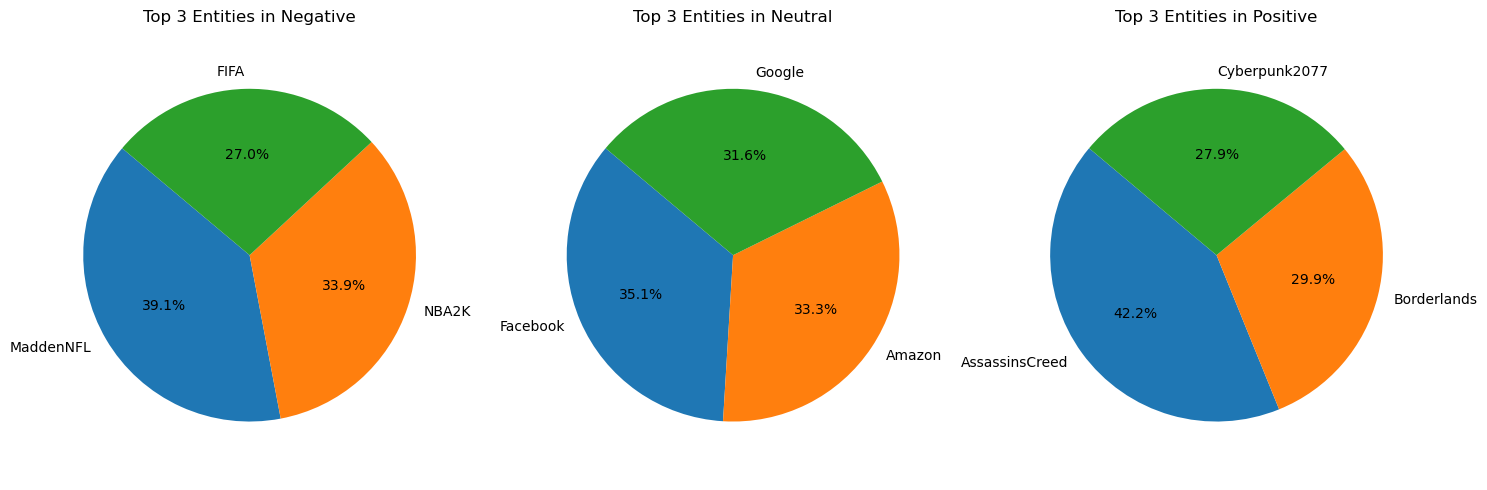

In [15]:

category_entity_counts = train_df.groupby(['Sentiment', 'Entity']).size().unstack(fill_value=0)


top_three_entities = []
for category in category_entity_counts.index:
    top_entities = category_entity_counts.loc[category].nlargest(3)
    top_three_entities.append(top_entities)


plt.figure(figsize=(15, 5))
for i, (category, top_entities) in enumerate(zip(category_entity_counts.index, top_three_entities)):
    plt.subplot(1, 3, i + 1)
    plt.pie(top_entities, labels=top_entities.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 3 Entities in {category}')

plt.tight_layout()
plt.show()

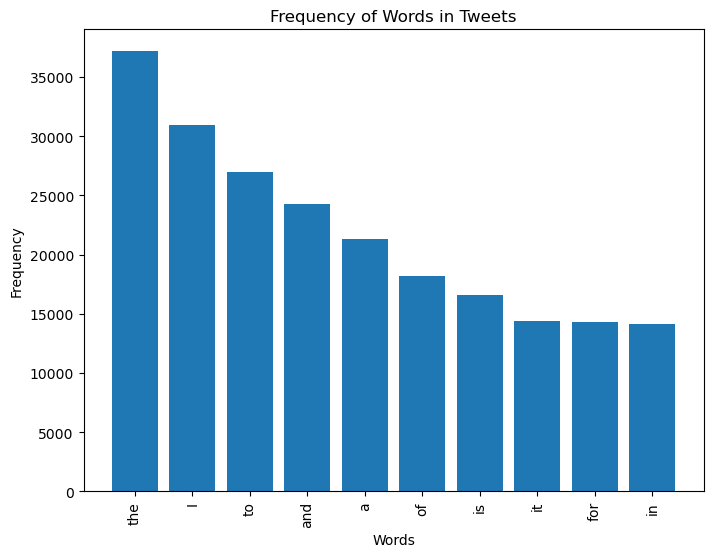

In [16]:
# Combine all the text into a single string
all_text = " ".join(train_df["Tweet"])

word_list = all_text.split()
word_df = pd.DataFrame({"word": word_list})

word_df_freq = word_df["word"].value_counts().reset_index()
word_df_freq.columns = ["word", "count"]
top_10_words = word_df_freq.head(10)

plt.figure(figsize=(8, 6))
plt.bar(top_10_words['word'], top_10_words['count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Words in Tweets')
plt.xticks(rotation=90)
plt.show()


Number of unique words: 66740


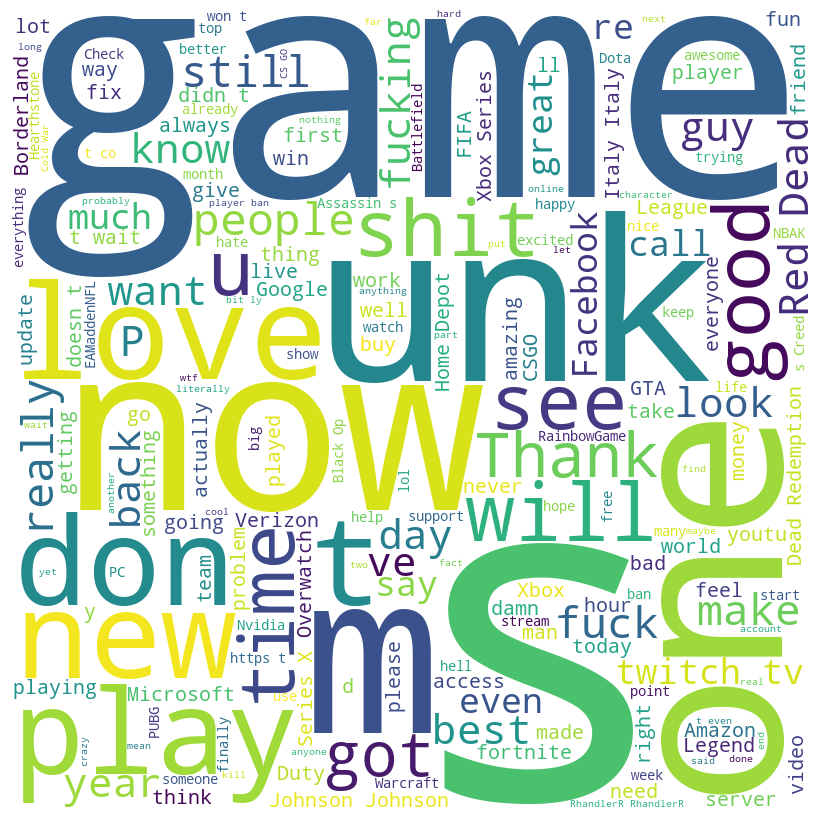

In [17]:

unique_words_count = train_df['Tweet'].nunique()
print("Number of unique words:", unique_words_count)

text_data = train_df['Tweet'].astype(str).str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_data)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [18]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
bow = bow_vectorizer.fit_transform(train_df['Tweet'])



In [19]:
#spliting the cleaned data into test and train
X_train, X_test, y_train, y_test = train_test_split(bow, train_df['Sentiment'], test_size=0.2, random_state=69)


In [20]:

model_naive = MultinomialNB().fit(X_train,y_train)
pred = model_naive.predict(X_test)
print('Optimized Accuracy Score: {0: .3f}'.format(accuracy_score(y_test, pred)))

Optimized Accuracy Score:  0.604


In [21]:

def accuracy(pred, y_test):
    l=0
    for i,j in zip(pred, y_test):
        if i==j:
            l=l+1
    return l/len(pred)

In [22]:

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
preds=model.predict(X_train)
accuracy(preds,y_train)

0.9271741333873911